In [221]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import warnings


warnings.filterwarnings("ignore")


diamonds = sns.load_dataset("diamonds")

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [222]:
diamonds.shape

(53940, 10)

In [223]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [224]:
diamonds.describe(exclude=np.number)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [225]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = diamonds.drop('price', axis=1), diamonds[['price']]

In [226]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [227]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


In [228]:
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')

In [229]:
X.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
x           float64
y           float64
z           float64
dtype: object

In [230]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [231]:
X_test.shape

(13485, 9)

In [232]:
X_prediction=X_test.head(100)
y_prediction =y_test.head(100)


In [233]:
y_prediction=np.array(y_prediction)

In [234]:
type(y_prediction)

numpy.ndarray

In [235]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

# Cross-Validation


In [236]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)



In [237]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2874.530912,9.576510,2877.437274,37.093540
1,2089.327469,8.317290,2094.021636,24.828795
2,1550.617973,5.223297,1558.386252,18.540267
3,1183.812759,5.193420,1195.032441,13.471580
4,941.203113,4.539805,958.728828,9.479449


In [238]:
best_rmse = results['test-rmse-mean'].min()

best_rmse


549.311480649509

# Train way

In [239]:

evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
n = 100

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=10, # Every ten rounds
   early_stopping_rounds=10

)


[0]	validation-rmse:2817.38773	train-rmse:2874.29379


[10]	validation-rmse:586.99790	train-rmse:543.85303
[20]	validation-rmse:556.44229	train-rmse:487.42071
[30]	validation-rmse:554.68339	train-rmse:460.86396
[40]	validation-rmse:552.62130	train-rmse:444.03762
[50]	validation-rmse:553.50718	train-rmse:430.07110
[60]	validation-rmse:555.44368	train-rmse:418.57995
[70]	validation-rmse:555.06703	train-rmse:406.77489
[80]	validation-rmse:555.00800	train-rmse:394.18070
[90]	validation-rmse:555.74725	train-rmse:382.65353
[99]	validation-rmse:555.60692	train-rmse:373.74308


In [240]:
import xgboost as xgb
import matplotlib.pyplot as plt

prediction=xgb.DMatrix(X_prediction,y_prediction,  enable_categorical=True)



In [241]:
pre_res=model.predict(prediction)

In [242]:
pre_res.shape

(100,)

In [244]:
y_prediction=np.array(y_prediction)

y_prediction=y_prediction.reshape(len(y_prediction),)
y_prediction.shape

(100,)

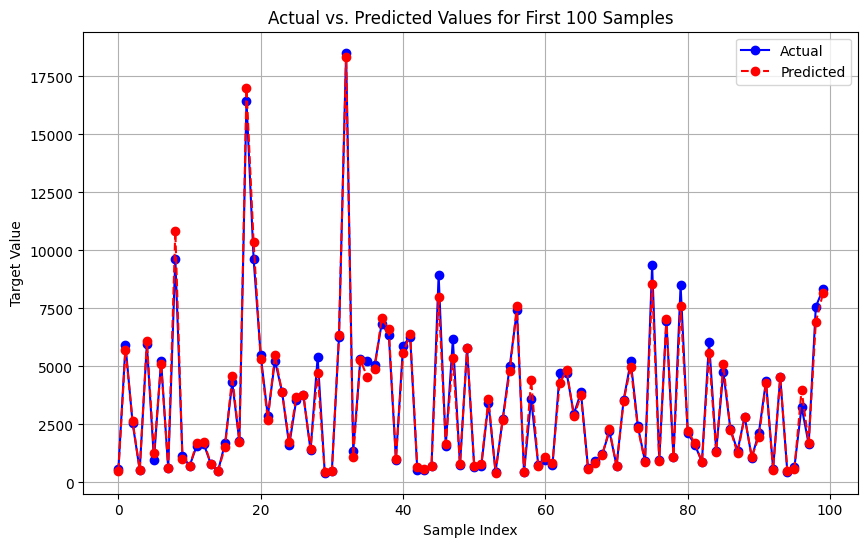

In [246]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have already trained the XGBoost model and have `model` defined


# Create a list of sample indices (0 to 9) for labeling
sample_indices = list(range(len(y_prediction)))

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(sample_indices, y_prediction, marker='o', linestyle='-', label='Actual', color='b')
plt.plot(sample_indices, pre_res, marker='o', linestyle='--', label='Predicted', color='r')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs. Predicted Values for First 100 Samples')
plt.legend()
plt.grid(True)
plt.show()
